In [168]:
import sys
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import math
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, f1_score,mean_squared_error,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import linear_model


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal

import time
import xgboost as xgb
import seaborn as sns

In [169]:
def R_oss(y_test,y_pred):
    
    sum_numerator = 0
    sum_denom = 0
    
        
    for i in range(len(y_pred)):
        sum_numerator += (y_test[i]-y_pred[i])**2
        sum_denom += (y_test[i] - y_test.mean())**2
    R_Oss_GKX = 1 - ((sum_numerator)/(sum(y_test**2)))
    R_Oss = 1 - ((sum_numerator)/(sum_denom))
    
    print("Mean Squared Error is", mean_squared_error(y_test, y_pred))
    print("R_Oos is",R_Oss*100,"%")
    print("R_Oos GKX is",R_Oss_GKX*100,"%")
    
def train_test(X,y,train_start,train_end,test_end):
    
    train = (train_start <= X.index) & (X.index < train_end)
    test = (train_end <= X.index) & (X.index <= test_end)

    X_train = X[train]
    y_train = y[train].values.ravel()
    X_test = X[test]
    y_test = y[test].values.ravel()
    
    return X_train,y_train,X_test,y_test

### Predicting stock from News using Decession Trees, Random Forest and XGBoost

In [170]:
def decision_tree_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)
    sc = StandardScaler()
    X_train = data[0]#sc.fit_transform(data[0].values)
    X_test = data[2]#sc.transform(data[2].values)

    clf = tree.DecisionTreeRegressor()
    clf.fit(X_train,data[1])
    y_pred = clf.predict(X_test)

    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i]))
        real_cum.append(sum(data[3][:i]))
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return clf

In [171]:
def random_forest_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)

    regr = RandomForestRegressor(max_depth=None, random_state=0)
    regr.fit(data[0],data[1])
    y_pred = regr.predict(data[2]).ravel()

    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i]))
        real_cum.append(sum(data[3][:i]))
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return regr

In [172]:
def xgb_regression_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)
   
    xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0.0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
    xgb_model.fit(data[0],data[1])
    y_pred = xgb_model.predict(data[2])

    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i]))
        real_cum.append(sum(data[3][:i]))
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return xgb

## Predicting stock from News using Decession Trees, Random Forest and XGBoost Classification

In [173]:
def random_forest_claasifier_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)
    sc = StandardScaler()
    X_train = sc.fit_transform(data[0].values)
    X_test = sc.transform(data[2].values)
    
    
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, data[1])
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(data[3], y_pred)
    conf_matrix = confusion_matrix(data[3], y_pred)
    
    print('Precision is: ',accuracy*100,'%')
    print(conf_matrix)
    
    importance =list( clf.feature_importances_)
    print('Most important feature is: ', X.columns[importance.index(max(importance))])
    plt.figure(figsize = (7,5))
    plt.bar(X.columns, importance )
    plt.xticks(rotation=90)
 
    plt.show()
    
    return clf

In [174]:
"""def xgb_classifier(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)
    

    
    xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 30)
    
 
    
    xg_reg.fit(data[0],data[1])
    y_pred = xg_reg.predict(data[2])   
    precision = accuracy_score(data[3], y_pred)
    conf_matrix = confusion_matrix(data[3], y_pred)
    
    
    print('Accuracy is: ',precision*100,'%')
    print(conf_matrix)

    importance =list( xg_reg.feature_importances_)
    print('Most important feature is: ', X.columns[importance.index(max(importance))])
    plt.figure(figsize=(7,5))
    plt.bar(X.columns, importance )
    plt.xticks(rotation=90)
    plt.show()
 
    plt.show()
    
    return xg_reg
   """ 

    
    
    

"def xgb_classifier(X,y,train_start,train_end,test_end):\n    \n    data =train_test(X,y,train_start,train_end,test_end)\n    \n\n    \n    xg_reg = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,\n                max_depth = 10, alpha = 10, n_estimators = 30)\n    \n \n    \n    xg_reg.fit(data[0],data[1])\n    y_pred = xg_reg.predict(data[2])   \n    precision = accuracy_score(data[3], y_pred)\n    conf_matrix = confusion_matrix(data[3], y_pred)\n    \n    \n    print('Accuracy is: ',precision*100,'%')\n    print(conf_matrix)\n\n    importance =list( xg_reg.feature_importances_)\n    print('Most important feature is: ', X.columns[importance.index(max(importance))])\n    plt.figure(figsize=(7,5))\n    plt.bar(X.columns, importance )\n    plt.xticks(rotation=90)\n    plt.show()\n \n    plt.show()\n    \n    return xg_reg\n   "

In [175]:
def xgb_classifier(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)
    
    eval_set = [(data[0],data[1]), (data[2], data[3])]
    eval_metric = ["auc","error"]
    
    xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.06,
                max_depth = 10, alpha = 10, n_estimators = 200)
    
 
    
    %time xg_reg.fit(data[0],data[1], eval_metric=eval_metric, eval_set=eval_set, verbose=True)
    y_pred = xg_reg.predict(data[2])   
    precision = accuracy_score(data[3], y_pred)
    #conf_matrix = confusion_matrix(data[3], y_pred)
    
    conf_matrix=metrics.confusion_matrix(data[3], y_pred)
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    
    print('Accuracy is: ',precision*100,'%')
    print(conf_matrix)
    importance =list( xg_reg.feature_importances_)
    print('Most important feature is: ', X.columns[importance.index(max(importance))])
    plt.figure(figsize=(7,5))
    plt.bar(X.columns, importance )
    plt.xticks(rotation=90)
    plt.show()
 

    results = xg_reg.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Error')
    plt.title('XGBoost Error')
    plt.show()
    
    xgb.to_graphviz(xg_reg, num_trees=1)
    plt.show()
    
    return xg_reg

In [176]:
def lasso_nlp(X,y,train_start,train_end,test_end,alpha=0.1):
    data =train_test(X,y,train_start,train_end,test_end)
    
    clf = linear_model.Lasso(alpha)
    clf.fit(data[0],data[1])
    y_pred = clf.predict(data[2])
    
    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i]))
        real_cum.append(sum(data[3][:i]))
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return clf
    


Mean Squared Error is 0.0004196862106759645
R_Oos is -115.7409798984951 %
R_Oos GKX is -115.5274239843151 %


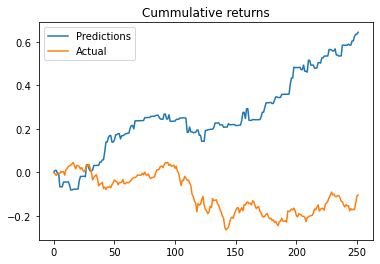

Mean Squared Error is 0.00031093958027734585
R_Oos is -59.839442020779245 %
R_Oos GKX is -59.68122146305848 %


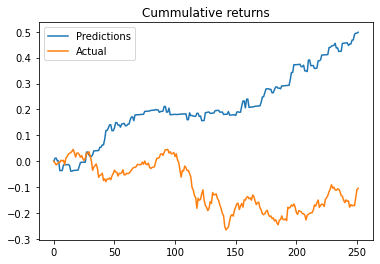

Mean Squared Error is 0.0002171736018054761
R_Oos is -11.638754073275702 %
R_Oos GKX is -11.528246017758148 %


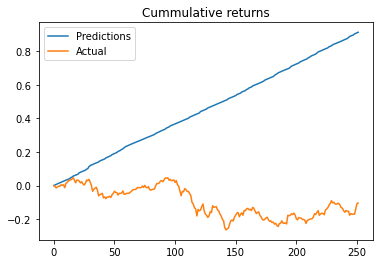

<module 'xgboost' from 'C:\\Anaconda\\lib\\site-packages\\xgboost\\__init__.py'>

In [177]:
#1 year training - 1 testing

Msft_final = pd.read_csv('Benchmark_Msft.csv', delimiter=',')
Msft_final.dataframeName = 'Benchmark_Msft.csv'
Msft_final.set_index('Date',inplace=True)

X_Msft,y_Msft = Msft_final[['compound']],Msft_final[['returns']]

decision_tree_nlp(X_Msft,y_Msft,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_Msft,y_Msft,'2008-12-04','2009-12-04','2010-12-04')
xgb_regression_nlp(X_Msft,y_Msft,'2008-12-04','2009-12-04','2010-12-04')

Mean Squared Error is 0.0007068284525764844
R_Oos is -135.53593595009895 %
R_Oos GKX is -132.43235913371626 %


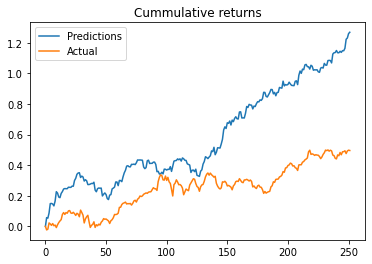

Mean Squared Error is 0.0004677011619456877
R_Oos is -55.85172119525876 %
R_Oos GKX is -53.79811614028567 %


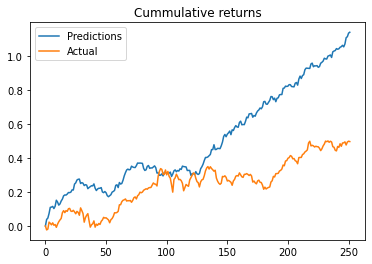

Mean Squared Error is 0.0003110427192381359
R_Oos is -3.6485412113354876 %
R_Oos GKX is -2.282799681246672 %


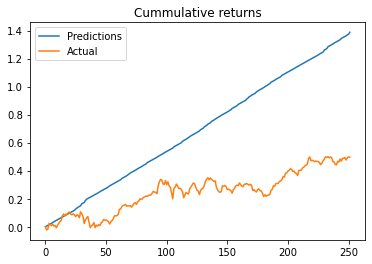

<module 'xgboost' from 'C:\\Anaconda\\lib\\site-packages\\xgboost\\__init__.py'>

In [162]:
Appl_final = pd.read_csv('Benchmark_Apple.csv', delimiter=',')
Appl_final.dataframeName = 'Benchmark_Apple.csv'
Appl_final.set_index('Date',inplace=True)

X_Appl,y_Appl = Appl_final[['compound']],Appl_final[['returns']]

#1 year training - 1 testing

decision_tree_nlp(X_Appl,y_Appl,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_Appl,y_Appl,'2008-12-04','2009-12-04','2010-12-04')
xgb_regression_nlp(X_Appl,y_Appl,'2008-12-04','2009-12-04','2010-12-04')

In [149]:
Dataset_final = pd.read_csv('Dataset_final_v2.csv')
Dataset_final.dataframeName = 'Dataset_final_v2.csv'
Dataset_final.set_index('Date',inplace=True)


top_news_ex = ['Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14',
           'Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25']
Dataset_final

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Apple returns,Apple 50_m_avg,Apple 250_m_avg,Apple Label,Apple flows,Microsoft returns,Microsoft 50_m_avg,Microsoft 250_m_avg,Microsoft Label,Microsoft flows
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,-0.5994,...,0.023375,-0.001033,0.001552,1,10406200.0,-0.008210,0.000229,0.000003,0,-1751700.0
2008-08-11,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.6688,-0.3400,...,0.018100,-0.000666,0.001706,1,44326800.0,0.007854,0.000435,0.000014,0,-12070300.0
2008-08-12,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,-0.7650,...,0.014437,-0.000644,0.001539,1,-13756400.0,-0.007496,0.000267,-0.000048,1,-5930800.0
2008-08-13,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,0.3612,0.0000,...,0.000112,-0.001500,0.001453,0,1516900.0,0.000000,-0.000349,-0.000064,1,-11647800.0
2008-08-14,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,-0.6808,-0.3400,...,-0.020166,-0.001136,0.001273,1,-32761400.0,-0.003589,0.000145,-0.000055,0,-1432900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,-0.2263,0.2732,-0.6369,-0.1027,0.6369,-0.5423,-0.7096,-0.5719,-0.5859,0.0000,...,0.016700,-0.002489,-0.001169,1,-29821800.0,0.020640,-0.002191,0.000518,1,-83286700.0
2016-06-28,0.8316,-0.4588,0.4939,0.3182,-0.7717,-0.7351,0.0000,0.2960,-0.2732,0.0000,...,0.008618,-0.002277,-0.001104,1,-5044700.0,0.022005,-0.001657,0.000569,0,-12075600.0
2016-06-29,0.0000,-0.6808,0.7783,-0.7430,-0.4404,0.0000,-0.8020,0.2960,0.5719,-0.1779,...,0.012632,-0.001999,-0.001082,1,-3913900.0,0.012388,-0.001729,0.000576,1,-6836700.0


In [150]:
X_App,y_App = Dataset_final.drop(['Apple returns','Microsoft returns','Apple Label','Microsoft Label'],axis=1),Dataset_final['Apple returns']

Mean Squared Error is 0.0006608602593069257
R_Oos is -144.02006181630404 %
R_Oos GKX is -143.2611101423857 %


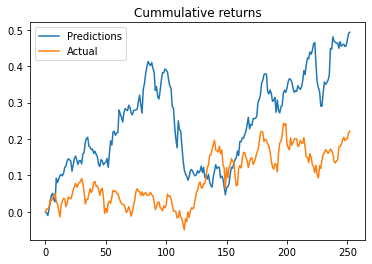

Mean Squared Error is 0.0002811164266901486
R_Oos is -3.8011392763281027 %
R_Oos GKX is -3.4782967697652323 %


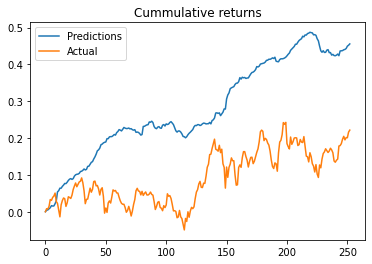

Mean Squared Error is 0.0002025668616620875
R_Oos is -14.70427484638559 %
R_Oos GKX is -14.68031202923954 %


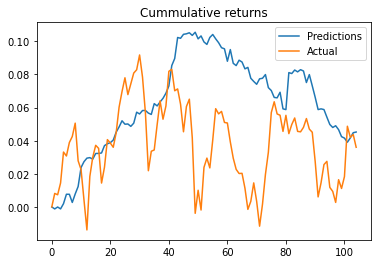

Mean Squared Error is 0.0003345535096705888
R_Oos is 1.122598594278712 %
R_Oos GKX is 1.5650547568310746 %


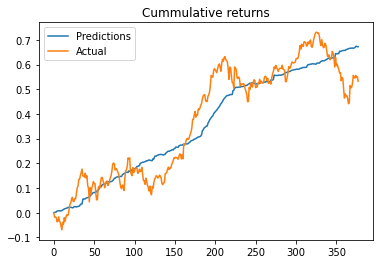

Mean Squared Error is 0.005498070614796583
R_Oos is -2069.603628260208 %
R_Oos GKX is -2069.5876174032187 %


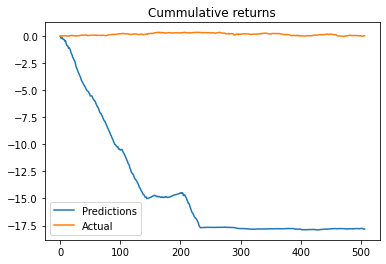

<module 'xgboost' from 'C:\\Anaconda\\lib\\site-packages\\xgboost\\__init__.py'>

In [191]:
decision_tree_nlp(X_App,y_App,'2008-08-08','2011-01-04','2012-01-04')
random_forest_nlp(X_App,y_App,'2008-08-08','2011-01-04','2012-01-04')#'2008-12-04','2009-12-04','2010-06-04') '2008-08-08','2011-01-04','2012-01-04'
xgb_regression_nlp(X_App,y_App,'2008-08-08','2011-01-04','2011-06-04')
xgb_regression_nlp(X_App,y_App,'2009-02-08','2011-06-04','2012-12-04')
xgb_regression_nlp(X_App,y_App,'2008-08-08','2014-06-30','2016-07-01')

Mean Squared Error is 0.0005490299869164843
R_Oos is -145.77029265688114 %
R_Oos GKX is -145.7665768155295 %


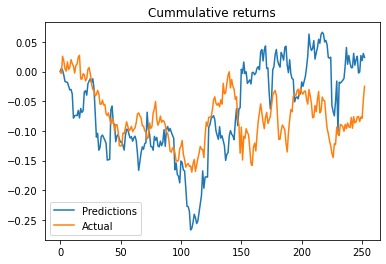

Mean Squared Error is 0.0002383197893949203
R_Oos is -6.682559753198958 %
R_Oos GKX is -6.680946802086174 %


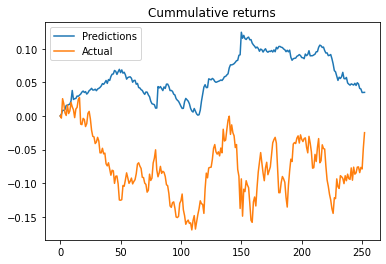

Mean Squared Error is 0.00024850921715389654
R_Oos is -3.5125370961255786 %
R_Oos GKX is -3.4064102303172916 %


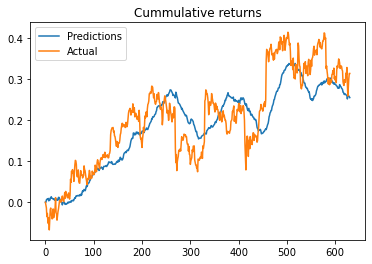

<module 'xgboost' from 'C:\\Anaconda\\lib\\site-packages\\xgboost\\__init__.py'>

In [188]:
X_Ms,y_Ms = Dataset_final.drop(['Apple returns','Microsoft returns','Apple Label','Microsoft Label'],axis=1),Dataset_final['Microsoft returns']

decision_tree_nlp(X_Ms,y_Ms,'2008-08-08','2011-01-04','2012-01-04') #2008-08-08','2011-01-04','2012-01-04'
random_forest_nlp(X_Ms,y_Ms,'2008-08-08','2011-01-04','2012-01-04')
xgb_regression_nlp(X_Ms,y_Ms,'2008-08-08','2013-12-31','2016-07-01')

In [183]:
X_class_apple = Dataset_final.drop(['Apple Label','Apple returns','Microsoft returns','Microsoft Label'],axis=1)#
y_class_apple = Dataset_final['Apple Label']
X_class_msft = Dataset_final.drop(['Apple returns','Microsoft returns','Microsoft Label','Apple Label'],axis=1)
y_class_msft = Dataset_final['Microsoft Label']

Precision is:  88.09523809523809 %
[[ 0  5]
 [ 0 37]]
Most important feature is:  Apple flows


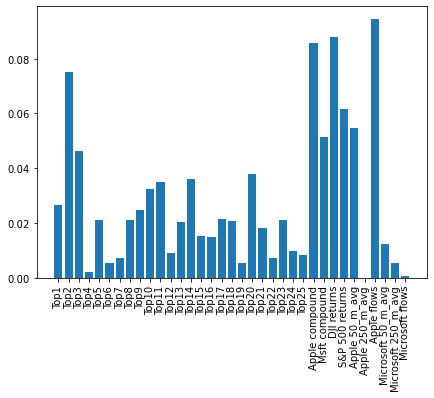

[0]	validation_0-auc:0.82068	validation_0-error:0.08738	validation_1-auc:0.50840	validation_1-error:0.19889
[1]	validation_0-auc:0.82068	validation_0-error:0.06796	validation_1-auc:0.50840	validation_1-error:0.08103
[2]	validation_0-auc:0.88765	validation_0-error:0.06796	validation_1-auc:0.49376	validation_1-error:0.08103
[3]	validation_0-auc:0.88914	validation_0-error:0.06796	validation_1-auc:0.49337	validation_1-error:0.08103
[4]	validation_0-auc:0.89137	validation_0-error:0.06796	validation_1-auc:0.48868	validation_1-error:0.08103
[5]	validation_0-auc:0.88839	validation_0-error:0.06796	validation_1-auc:0.48326	validation_1-error:0.08103
[6]	validation_0-auc:0.88393	validation_0-error:0.06796	validation_1-auc:0.48167	validation_1-error:0.08103
[7]	validation_0-auc:0.88839	validation_0-error:0.06796	validation_1-auc:0.48235	validation_1-error:0.08103
[8]	validation_0-auc:0.88839	validation_0-error:0.06796	validation_1-auc:0.48235	validation_1-error:0.08103
[9]	validation_0-auc:0.88393

[76]	validation_0-auc:0.99405	validation_0-error:0.06796	validation_1-auc:0.77314	validation_1-error:0.08103
[77]	validation_0-auc:0.99405	validation_0-error:0.06796	validation_1-auc:0.77314	validation_1-error:0.08103
[78]	validation_0-auc:0.99405	validation_0-error:0.06796	validation_1-auc:0.77314	validation_1-error:0.08103
[79]	validation_0-auc:0.99405	validation_0-error:0.06796	validation_1-auc:0.77314	validation_1-error:0.08103
[80]	validation_0-auc:0.99405	validation_0-error:0.06796	validation_1-auc:0.77364	validation_1-error:0.08103
[81]	validation_0-auc:0.99405	validation_0-error:0.06796	validation_1-auc:0.77450	validation_1-error:0.08103
[82]	validation_0-auc:0.99405	validation_0-error:0.06796	validation_1-auc:0.77428	validation_1-error:0.08103
[83]	validation_0-auc:0.99554	validation_0-error:0.06796	validation_1-auc:0.77318	validation_1-error:0.08103
[84]	validation_0-auc:0.99554	validation_0-error:0.06796	validation_1-auc:0.77368	validation_1-error:0.08103
[85]	validation_0-a

[151]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77819	validation_1-error:0.08103
[152]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77828	validation_1-error:0.08103
[153]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77833	validation_1-error:0.08103
[154]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77833	validation_1-error:0.08103
[155]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77833	validation_1-error:0.08103
[156]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77833	validation_1-error:0.08103
[157]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77833	validation_1-error:0.08103
[158]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77865	validation_1-error:0.08103
[159]	validation_0-auc:0.99702	validation_0-error:0.06796	validation_1-auc:0.77869	validation_1-error:0.08103
[160]	vali

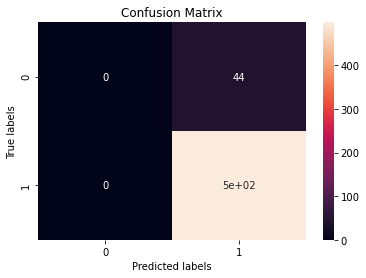

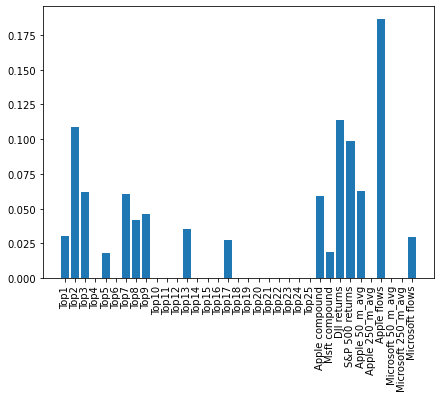

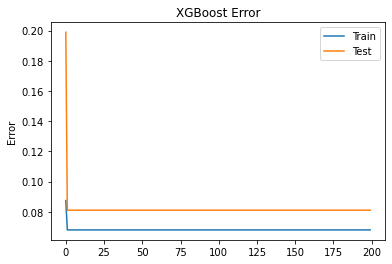

Precision is:  93.66336633663367 %
[[  0  32]
 [  0 473]]
Most important feature is:  Apple compound


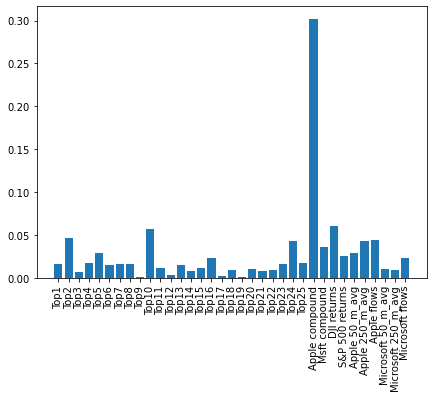

[0]	validation_0-auc:0.51522	validation_0-error:0.09904	validation_1-auc:0.49632	validation_1-error:0.06168
[1]	validation_0-auc:1.00000	validation_0-error:0.09308	validation_1-auc:0.99862	validation_1-error:0.05473
[2]	validation_0-auc:1.00000	validation_0-error:0.09308	validation_1-auc:0.99862	validation_1-error:0.05473
[3]	validation_0-auc:1.00000	validation_0-error:0.09546	validation_1-auc:0.99864	validation_1-error:0.05473
[4]	validation_0-auc:1.00000	validation_0-error:0.09546	validation_1-auc:0.99864	validation_1-error:0.05473
[5]	validation_0-auc:1.00000	validation_0-error:0.09546	validation_1-auc:0.99864	validation_1-error:0.05473
[6]	validation_0-auc:0.99778	validation_0-error:0.09546	validation_1-auc:0.98688	validation_1-error:0.05473
[7]	validation_0-auc:0.99204	validation_0-error:0.09666	validation_1-auc:0.97505	validation_1-error:0.05473
[8]	validation_0-auc:0.99204	validation_0-error:0.09666	validation_1-auc:0.97505	validation_1-error:0.05473
[9]	validation_0-auc:0.99181

[76]	validation_0-auc:1.00000	validation_0-error:0.00358	validation_1-auc:0.99899	validation_1-error:0.01825
[77]	validation_0-auc:1.00000	validation_0-error:0.00477	validation_1-auc:0.99901	validation_1-error:0.01825
[78]	validation_0-auc:1.00000	validation_0-error:0.00477	validation_1-auc:0.99904	validation_1-error:0.01911
[79]	validation_0-auc:1.00000	validation_0-error:0.00597	validation_1-auc:0.99904	validation_1-error:0.01998
[80]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99904	validation_1-error:0.01129
[81]	validation_0-auc:1.00000	validation_0-error:0.00119	validation_1-auc:0.99904	validation_1-error:0.00695
[82]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99904	validation_1-error:0.00782
[83]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99904	validation_1-error:0.00695
[84]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99904	validation_1-error:0.00347
[85]	validation_0-a

[151]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[152]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[153]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[154]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[155]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[156]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[157]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[158]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[159]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[160]	vali

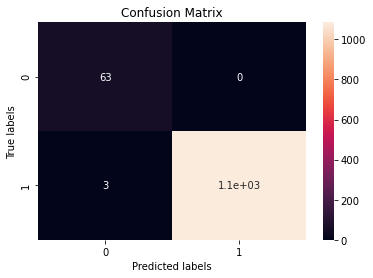

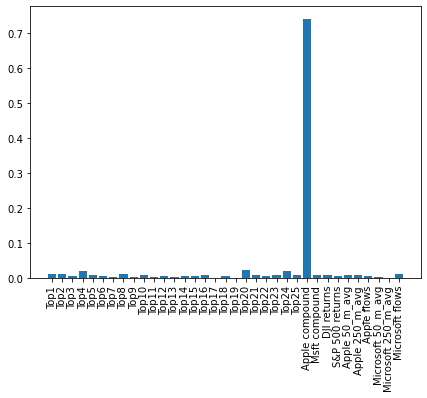

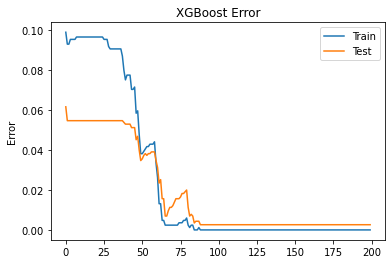

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
#Stock dropping
random_forest_claasifier_nlp(X_class_apple,y_class_apple,'2010-08-08','2011-01-04','2011-03-04')
xgb_classifier(X_class_apple,y_class_apple,'2010-08-08','2011-01-04','2013-03-04')
#Stock icreasing
random_forest_claasifier_nlp(X_class_apple,y_class_apple,'2008-08-04','2012-12-04','2014-12-04')
xgb_classifier(X_class_apple,y_class_apple,'2008-08-04','2011-12-04','2016-07-01')

Precision is:  83.33333333333334 %
[[24  2]
 [ 5 11]]
Most important feature is:  Msft compound


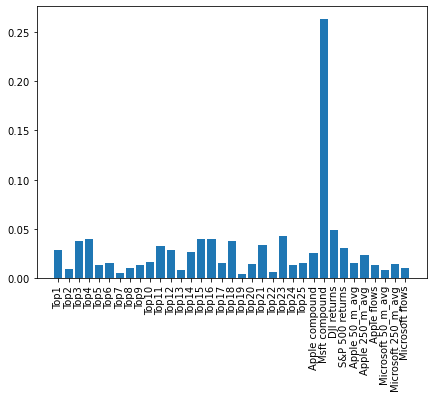

[0]	validation_0-auc:0.64213	validation_0-error:0.39890	validation_1-auc:0.47211	validation_1-error:0.50167
[1]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[2]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[3]	validation_0-auc:1.00000	validation_0-error:0.00184	validation_1-auc:1.00000	validation_1-error:0.00111
[4]	validation_0-auc:1.00000	validation_0-error:0.00735	validation_1-auc:0.99996	validation_1-error:0.01443
[5]	validation_0-auc:0.99989	validation_0-error:0.01471	validation_1-auc:0.99889	validation_1-error:0.02997
[6]	validation_0-auc:0.99991	validation_0-error:0.01746	validation_1-auc:0.99611	validation_1-error:0.04439
[7]	validation_0-auc:0.99965	validation_0-error:0.02574	validation_1-auc:0.99038	validation_1-error:0.07214
[8]	validation_0-auc:0.99956	validation_0-error:0.02757	validation_1-auc:0.98527	validation_1-error:0.08546
[9]	validation_0-auc:0.99924

[76]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[77]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[78]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[79]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[80]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[81]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[82]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[83]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[84]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[85]	validation_0-a

[151]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[152]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[153]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[154]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[155]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[156]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[157]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[158]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[159]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:1.00000	validation_1-error:0.00000
[160]	vali

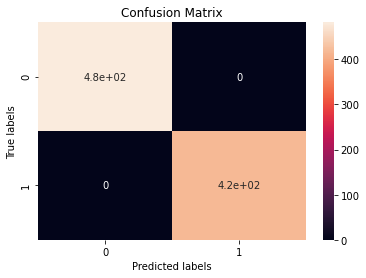

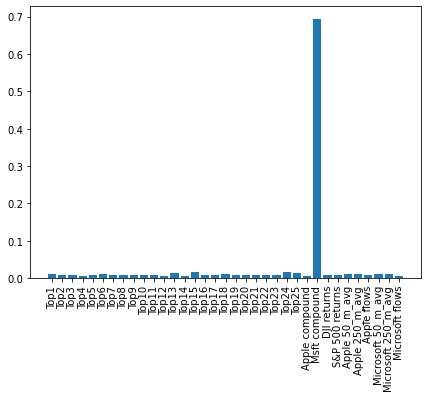

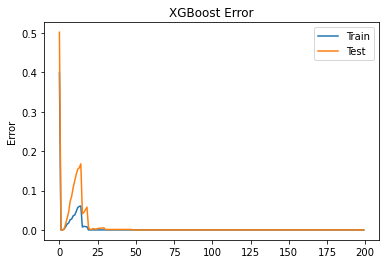

Precision is:  84.09542743538768 %
[[263   0]
 [ 80 160]]
Most important feature is:  Msft compound


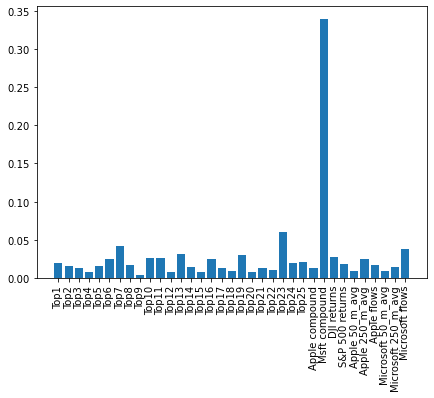

[0]	validation_0-auc:0.66933	validation_0-error:0.39737	validation_1-auc:0.48836	validation_1-error:0.48306
[1]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99855	validation_1-error:0.00174
[2]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99903	validation_1-error:0.00174
[3]	validation_0-auc:1.00000	validation_0-error:0.00358	validation_1-auc:0.99905	validation_1-error:0.01043
[4]	validation_0-auc:1.00000	validation_0-error:0.00835	validation_1-auc:0.99823	validation_1-error:0.03388
[5]	validation_0-auc:0.99971	validation_0-error:0.02148	validation_1-auc:0.99465	validation_1-error:0.08167
[6]	validation_0-auc:0.99973	validation_0-error:0.02745	validation_1-auc:0.99118	validation_1-error:0.10165
[7]	validation_0-auc:0.99890	validation_0-error:0.04535	validation_1-auc:0.97901	validation_1-error:0.13206
[8]	validation_0-auc:0.99783	validation_0-error:0.05251	validation_1-auc:0.96904	validation_1-error:0.15291
[9]	validation_0-auc:0.99800

[76]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[77]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[78]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[79]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[80]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[81]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[82]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[83]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[84]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[85]	validation_0-a

[151]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[152]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[153]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[154]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[155]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[156]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[157]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[158]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[159]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[160]	vali

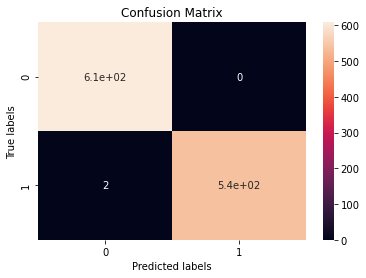

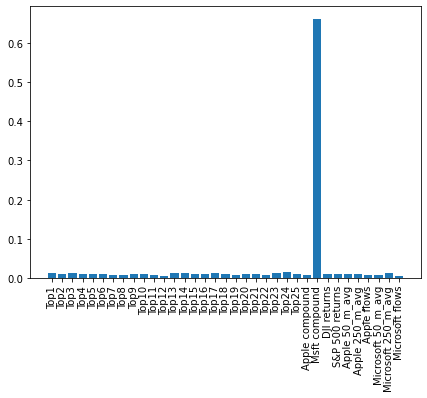

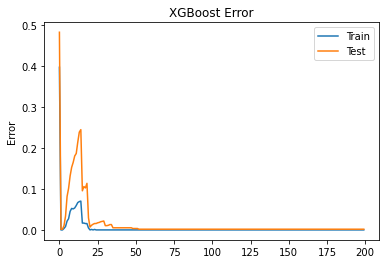

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
random_forest_claasifier_nlp(X_class_msft,y_class_msft,'2010-08-08','2011-01-04','2011-03-04')
xgb_classifier(X_class_msft,y_class_msft,'2008-08-04','2012-12-04','2016-07-01')
random_forest_claasifier_nlp(X_class_msft,y_class_msft,'2008-12-04','2010-12-04','2012-12-04')
xgb_classifier(X_class_msft,y_class_msft,'2008-08-04','2011-12-04','2016-07-01')

[0]	validation_0-auc:0.66933	validation_0-error:0.39737	validation_1-auc:0.48836	validation_1-error:0.48306
[1]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99855	validation_1-error:0.00174
[2]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99903	validation_1-error:0.00174
[3]	validation_0-auc:1.00000	validation_0-error:0.00358	validation_1-auc:0.99905	validation_1-error:0.01043
[4]	validation_0-auc:1.00000	validation_0-error:0.00835	validation_1-auc:0.99823	validation_1-error:0.03388
[5]	validation_0-auc:0.99971	validation_0-error:0.02148	validation_1-auc:0.99465	validation_1-error:0.08167
[6]	validation_0-auc:0.99973	validation_0-error:0.02745	validation_1-auc:0.99118	validation_1-error:0.10165
[7]	validation_0-auc:0.99890	validation_0-error:0.04535	validation_1-auc:0.97901	validation_1-error:0.13206
[8]	validation_0-auc:0.99783	validation_0-error:0.05251	validation_1-auc:0.96904	validation_1-error:0.15291
[9]	validation_0-auc:0.99800

[76]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[77]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[78]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[79]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[80]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[81]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[82]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[83]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[84]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[85]	validation_0-a

[151]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[152]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[153]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[154]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[155]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[156]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[157]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[158]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[159]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99763	validation_1-error:0.00174
[160]	vali

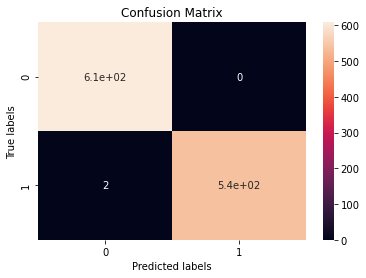

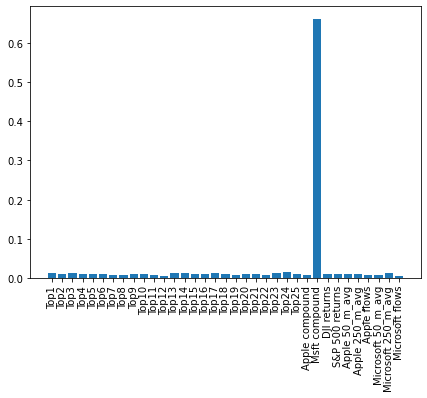

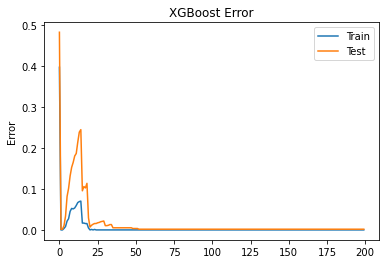

[0]	validation_0-auc:0.51522	validation_0-error:0.09904	validation_1-auc:0.49632	validation_1-error:0.06168
[1]	validation_0-auc:1.00000	validation_0-error:0.09308	validation_1-auc:0.99862	validation_1-error:0.05473
[2]	validation_0-auc:1.00000	validation_0-error:0.09308	validation_1-auc:0.99862	validation_1-error:0.05473
[3]	validation_0-auc:1.00000	validation_0-error:0.09546	validation_1-auc:0.99864	validation_1-error:0.05473
[4]	validation_0-auc:1.00000	validation_0-error:0.09546	validation_1-auc:0.99864	validation_1-error:0.05473
[5]	validation_0-auc:1.00000	validation_0-error:0.09546	validation_1-auc:0.99864	validation_1-error:0.05473
[6]	validation_0-auc:0.99778	validation_0-error:0.09546	validation_1-auc:0.98688	validation_1-error:0.05473
[7]	validation_0-auc:0.99204	validation_0-error:0.09666	validation_1-auc:0.97505	validation_1-error:0.05473
[8]	validation_0-auc:0.99204	validation_0-error:0.09666	validation_1-auc:0.97505	validation_1-error:0.05473
[9]	validation_0-auc:0.99181

[76]	validation_0-auc:1.00000	validation_0-error:0.00358	validation_1-auc:0.99899	validation_1-error:0.01825
[77]	validation_0-auc:1.00000	validation_0-error:0.00477	validation_1-auc:0.99901	validation_1-error:0.01825
[78]	validation_0-auc:1.00000	validation_0-error:0.00477	validation_1-auc:0.99904	validation_1-error:0.01911
[79]	validation_0-auc:1.00000	validation_0-error:0.00597	validation_1-auc:0.99904	validation_1-error:0.01998
[80]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99904	validation_1-error:0.01129
[81]	validation_0-auc:1.00000	validation_0-error:0.00119	validation_1-auc:0.99904	validation_1-error:0.00695
[82]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99904	validation_1-error:0.00782
[83]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99904	validation_1-error:0.00695
[84]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99904	validation_1-error:0.00347
[85]	validation_0-a

[151]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[152]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[153]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[154]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[155]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[156]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[157]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[158]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[159]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99907	validation_1-error:0.00261
[160]	vali

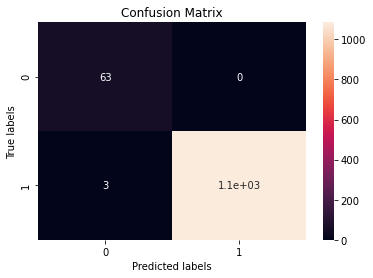

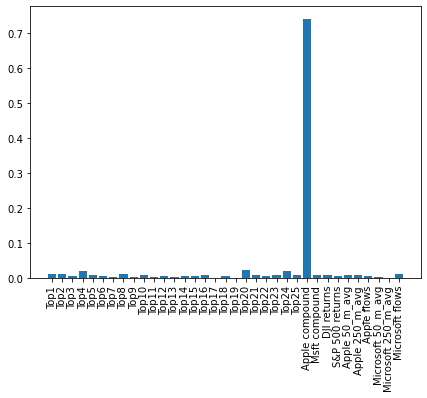

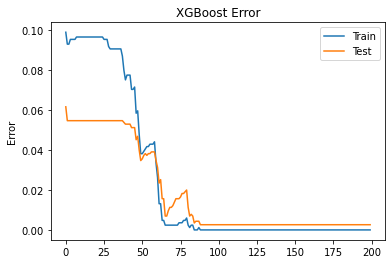

,Msft Signals,Appl Signals,rf,Appl_returns,Msft_returns,RetEx_Appl,RetEx_Msft
Date,,,,,,,
2011-12-05,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",0.010234,-0.005255,-0.001558,-0.015490,-0.011792
2011-12-06,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",0.001105,-0.004769,-0.002341,-0.005874,-0.003446
2011-12-07,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",0.002016,0.004027,-0.007843,0.002011,-0.009859
2011-12-08,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",-0.021368,0.007548,0.011742,0.028917,0.033110
2011-12-09,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",0.016742,-0.004532,-0.007420,-0.021275,-0.024163
...,...,...,...,...,...,...,...
2016-06-27,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",-0.018262,0.016700,0.020640,0.034963,0.038903
2016-06-28,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",0.017614,0.008618,0.022005,-0.008997,0.004391
2016-06-29,"XGBClassifier(alpha=10, base_score=0.5, booste...","XGBClassifier(alpha=10, base_score=0.5, booste...",0.016889,0.012632,0.012388,-0.004257,-0.004501


In [137]:
DQN_signals = pd.DataFrame()
DQN_signals['Date'] = Dataset_final.index[ ('2011-12-04'<= Dataset_final.index) & (Dataset_final.index <= '2016-07-01')]
DQN_signals['Msft Signals'] = xgb_classifier(X_class_msft,y_class_msft,'2008-08-04','2011-12-04','2016-07-01')
DQN_signals['Appl Signals']= xgb_classifier(X_class_apple,y_class_apple,'2008-08-04','2011-12-04','2016-07-01')
DQN_signals['rf'] = Dataset_final['S&P 500 returns'].values[ ('2011-12-04'<= Dataset_final.index) & (Dataset_final.index <= '2016-07-01')]
DQN_signals['Appl_returns'] = Dataset_final['Apple returns'].values[ ('2011-12-04'<= Dataset_final.index) & (Dataset_final.index <= '2016-07-01')]
DQN_signals['Msft_returns'] = Dataset_final['Microsoft returns'].values[ ('2011-12-04'<= Dataset_final.index) & (Dataset_final.index <= '2016-07-01')]
DQN_signals['RetEx_Appl'] = DQN_signals['Appl_returns'] - DQN_signals['rf'] 
DQN_signals['RetEx_Msft'] = DQN_signals['Msft_returns'] - DQN_signals['rf'] 
DQN_signals.set_index('Date',inplace=True)
DQN_signals.to_csv('DQN_signals.csv')#
DQN_signals

[0]	validation_0-auc:0.51522	validation_0-error:0.09904	validation_1-auc:0.49632	validation_1-error:0.06168
[1]	validation_0-auc:0.53043	validation_0-error:0.09666	validation_1-auc:0.48989	validation_1-error:0.05473
[2]	validation_0-auc:0.53043	validation_0-error:0.09666	validation_1-auc:0.48989	validation_1-error:0.05473
[3]	validation_0-auc:0.54151	validation_0-error:0.09666	validation_1-auc:0.49169	validation_1-error:0.05473
[4]	validation_0-auc:0.55884	validation_0-error:0.09666	validation_1-auc:0.48457	validation_1-error:0.05473
[5]	validation_0-auc:0.56586	validation_0-error:0.09666	validation_1-auc:0.48095	validation_1-error:0.05473
[6]	validation_0-auc:0.56583	validation_0-error:0.09666	validation_1-auc:0.48095	validation_1-error:0.05473
[7]	validation_0-auc:0.59249	validation_0-error:0.09666	validation_1-auc:0.47380	validation_1-error:0.05473
[8]	validation_0-auc:0.59284	validation_0-error:0.09666	validation_1-auc:0.47378	validation_1-error:0.05473
[9]	validation_0-auc:0.60367

[76]	validation_0-auc:1.00000	validation_0-error:0.01193	validation_1-auc:0.99888	validation_1-error:0.00695
[77]	validation_0-auc:1.00000	validation_0-error:0.01193	validation_1-auc:0.99888	validation_1-error:0.00695
[78]	validation_0-auc:1.00000	validation_0-error:0.01313	validation_1-auc:0.99889	validation_1-error:0.00695
[79]	validation_0-auc:1.00000	validation_0-error:0.01313	validation_1-auc:0.99888	validation_1-error:0.00695
[80]	validation_0-auc:1.00000	validation_0-error:0.00477	validation_1-auc:0.99888	validation_1-error:0.00347
[81]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99888	validation_1-error:0.00261
[82]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99888	validation_1-error:0.00261
[83]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99888	validation_1-error:0.00261
[84]	validation_0-auc:1.00000	validation_0-error:0.00239	validation_1-auc:0.99888	validation_1-error:0.00261
[85]	validation_0-a

[151]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[152]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[153]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[154]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[155]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[156]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[157]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[158]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[159]	validation_0-auc:1.00000	validation_0-error:0.00000	validation_1-auc:0.99891	validation_1-error:0.00261
[160]	vali

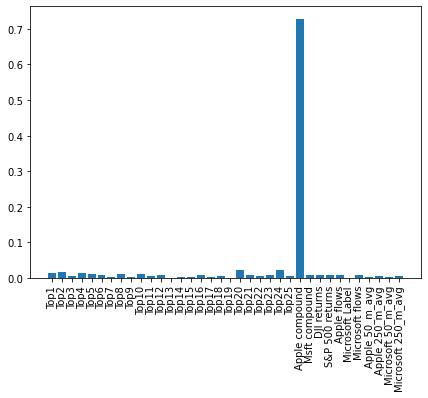

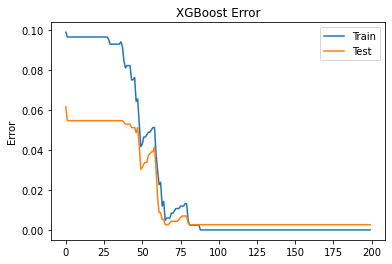

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [341]:


    

xgb_classifier(X_class_apple,y_class_apple,'2008-08-04','2011-12-04','2016-07-01') 

"""Training error higher than test error: your test error sample may be too small, so it by random
chance your model fit it better than the training set"""
""" https://www.quora.com/Is-it-possible-to-have-a-higher-train-error-than-a-test-
error-in-machine-learning#:~:text=1.-,Training%20error%20higher%20than%20test%20erro
r%3A%20your%20test%20error%20sample,better%20than%20the%20t
raining%20set.&text=However%20if%20your%20test%20set,you%20are%20over%20fitting%20severely."""